# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

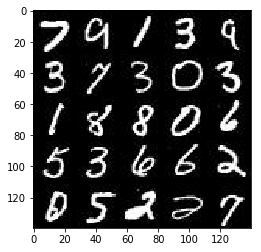

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

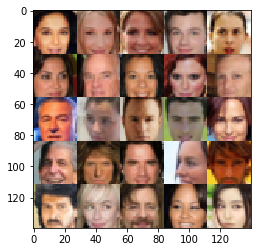

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    inputs_real=tf.placeholder(tf.float32,(None,image_width,image_height,image_channels),name='inputs_real')
    inputs_z=tf.placeholder(tf.float32,(None,z_dim),name='inputs_z')
    learning_rate=tf.placeholder(tf.float32,None,name='learning_rate')

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    alpha=0.2
    with tf.variable_scope('discriminator',reuse=reuse):
        
        x1=tf.layers.conv2d(images,64,5,strides=2,padding='same')
        relu1=tf.maximum(alpha*x1,x1)
        
        x2=tf.layers.conv2d(relu1,128,5,strides=2,padding='same')
        bn2=tf.layers.batch_normalization(x2,training=True)
        relu2=tf.maximum(alpha*bn2,bn2)
        
        x3=tf.layers.conv2d(relu2,256,5,strides=2,padding='same')
        bn3=tf.layers.batch_normalization(x3,training=True)
        relu3=tf.maximum(alpha*bn3,bn3)
        
        flat=tf.reshape(relu3,(-1,4*4*256))
        logits=tf.layers.dense(flat,1)
        out=tf.sigmoid(logits)

    return out,logits



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha=0.2
    with tf.variable_scope('generator',reuse=not is_train):
        x1=tf.layers.dense(z,7*7*256)
        x1=tf.reshape(x1,(-1,7,7,256))
        x1=tf.layers.batch_normalization(x1,training=is_train)
        x1=tf.maximum(alpha*x1,x1)
        
        x2=tf.layers.conv2d_transpose(x1,128,5,strides=2,padding='same')
        x2=tf.layers.batch_normalization(x2,training=is_train)
        x2=tf.maximum(alpha*x2,x2)
        
        x3=tf.layers.conv2d_transpose(x2,64,5,strides=2,padding='same')
        x3=tf.layers.batch_normalization(x3,training=is_train)
        x3=tf.maximum(alpha*x3,x3)
        
        logits=tf.layers.conv2d_transpose(x3,out_channel_dim,5,strides=1,padding='same')
        
        out=tf.tanh(logits)
    
    return out



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function   
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
        
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    
    d_updates = [opt for opt in update_ops if opt.name.startswith('discriminator')]
    g_updates = [opt for opt in update_ops if opt.name.startswith('generator')]

    with tf.control_dependencies(d_updates):
        d_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)

    with tf.control_dependencies(g_updates):
        g_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
        
    return d_opt, g_opt




"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    size=data_shape[1]
    dim=3 if data_image_mode=='RGB' else 1
    
    input_real,input_z,var_learning_rate=model_inputs(size,size,dim,z_dim)
    
    d_loss,g_loss=model_loss(input_real,input_z,dim)
    d_opt,g_opt=model_opt(d_loss,g_loss,var_learning_rate,beta1)
    
    samples,losses=[],[]
    steps=0
    print_every=10
    show_every=100
    
    saver=tf.train.Saver()

    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps+=1
                
                images=batch_images*2
                batch_z=np.random.uniform(-1,1,size=(batch_size,z_dim))
                
                _=sess.run(d_opt,feed_dict={
                    input_real:images,
                    input_z:batch_z,
                    var_learning_rate:learning_rate
                                           })
                
                _=sess.run(g_opt,feed_dict={
                    input_z:batch_z,
                    var_learning_rate:learning_rate
                })
                
                # At the end of each epoch,get the losses and print them out
                if steps % print_every ==0:
                    train_loss_d=d_loss.eval({input_z:batch_z,input_real:images})
                    train_loss_g=g_loss.eval({input_z:batch_z})
                    
                    print('Epoch {}/{}...'.format(epoch_i+1,epoch_count),
                         'Discriminator Loss:{:.4f}...'.format(train_loss_d),
                         'Generator Loss:{:.4f}'.format(train_loss_g))
                
                if steps % show_every ==0:
                    show_generator_output(sess,25,input_z,dim,data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss:0.8846... Generator Loss:0.7506
Epoch 1/2... Discriminator Loss:3.8291... Generator Loss:0.0515
Epoch 1/2... Discriminator Loss:1.9660... Generator Loss:0.2935
Epoch 1/2... Discriminator Loss:0.8406... Generator Loss:1.6055
Epoch 1/2... Discriminator Loss:1.2167... Generator Loss:1.3064
Epoch 1/2... Discriminator Loss:1.0958... Generator Loss:0.7398
Epoch 1/2... Discriminator Loss:1.7294... Generator Loss:0.3044
Epoch 1/2... Discriminator Loss:1.3409... Generator Loss:0.4645
Epoch 1/2... Discriminator Loss:0.9728... Generator Loss:1.4594
Epoch 1/2... Discriminator Loss:1.1492... Generator Loss:1.1005


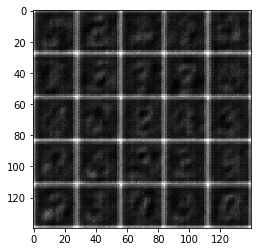

Epoch 1/2... Discriminator Loss:1.4936... Generator Loss:0.5372
Epoch 1/2... Discriminator Loss:1.0774... Generator Loss:0.8920
Epoch 1/2... Discriminator Loss:1.1180... Generator Loss:0.7179
Epoch 1/2... Discriminator Loss:1.0946... Generator Loss:0.9101
Epoch 1/2... Discriminator Loss:0.9241... Generator Loss:1.0817
Epoch 1/2... Discriminator Loss:1.1242... Generator Loss:0.5844
Epoch 1/2... Discriminator Loss:0.7676... Generator Loss:1.3975
Epoch 1/2... Discriminator Loss:0.9164... Generator Loss:1.1293
Epoch 1/2... Discriminator Loss:1.1513... Generator Loss:0.5852
Epoch 1/2... Discriminator Loss:1.0884... Generator Loss:0.6160


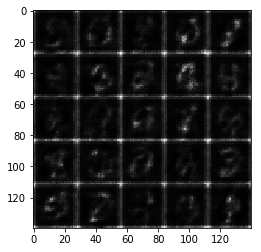

Epoch 1/2... Discriminator Loss:1.0304... Generator Loss:0.6579
Epoch 1/2... Discriminator Loss:1.3559... Generator Loss:0.3751
Epoch 1/2... Discriminator Loss:0.7117... Generator Loss:1.5889
Epoch 1/2... Discriminator Loss:1.0906... Generator Loss:0.5561
Epoch 1/2... Discriminator Loss:1.1565... Generator Loss:0.4907
Epoch 1/2... Discriminator Loss:0.7025... Generator Loss:1.2946
Epoch 1/2... Discriminator Loss:0.8645... Generator Loss:2.4900
Epoch 1/2... Discriminator Loss:0.5404... Generator Loss:1.5784
Epoch 1/2... Discriminator Loss:0.8106... Generator Loss:1.2948
Epoch 1/2... Discriminator Loss:0.7461... Generator Loss:1.1499


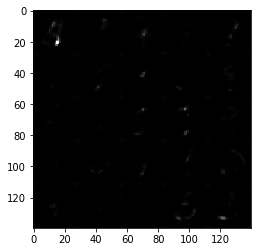

Epoch 1/2... Discriminator Loss:0.8948... Generator Loss:0.7186
Epoch 1/2... Discriminator Loss:0.8070... Generator Loss:0.8933
Epoch 1/2... Discriminator Loss:0.8610... Generator Loss:0.7871
Epoch 1/2... Discriminator Loss:0.8224... Generator Loss:1.0218
Epoch 1/2... Discriminator Loss:0.6180... Generator Loss:1.5995
Epoch 1/2... Discriminator Loss:2.2233... Generator Loss:0.1628
Epoch 1/2... Discriminator Loss:0.6795... Generator Loss:1.3286
Epoch 1/2... Discriminator Loss:0.5935... Generator Loss:1.4397
Epoch 1/2... Discriminator Loss:0.8737... Generator Loss:1.6987
Epoch 1/2... Discriminator Loss:1.0860... Generator Loss:0.5438


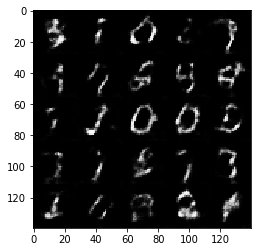

Epoch 1/2... Discriminator Loss:0.7517... Generator Loss:0.8685
Epoch 1/2... Discriminator Loss:1.2904... Generator Loss:0.4377
Epoch 1/2... Discriminator Loss:1.3027... Generator Loss:0.4609
Epoch 1/2... Discriminator Loss:0.6706... Generator Loss:1.4992
Epoch 1/2... Discriminator Loss:1.0407... Generator Loss:1.5086
Epoch 1/2... Discriminator Loss:1.2901... Generator Loss:2.2893
Epoch 1/2... Discriminator Loss:1.0865... Generator Loss:0.6522
Epoch 1/2... Discriminator Loss:1.4293... Generator Loss:0.3861
Epoch 1/2... Discriminator Loss:0.7174... Generator Loss:1.2188
Epoch 1/2... Discriminator Loss:0.8149... Generator Loss:1.0128


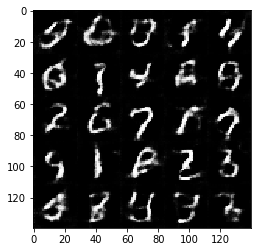

Epoch 1/2... Discriminator Loss:0.9082... Generator Loss:1.8955
Epoch 1/2... Discriminator Loss:0.8906... Generator Loss:1.0315
Epoch 1/2... Discriminator Loss:1.2622... Generator Loss:0.4729
Epoch 1/2... Discriminator Loss:0.7908... Generator Loss:1.1532
Epoch 1/2... Discriminator Loss:0.8965... Generator Loss:1.7572
Epoch 1/2... Discriminator Loss:0.8053... Generator Loss:1.5169
Epoch 1/2... Discriminator Loss:1.1414... Generator Loss:1.8579
Epoch 1/2... Discriminator Loss:1.3633... Generator Loss:0.4527
Epoch 1/2... Discriminator Loss:0.8376... Generator Loss:1.1129
Epoch 1/2... Discriminator Loss:0.8189... Generator Loss:1.4606


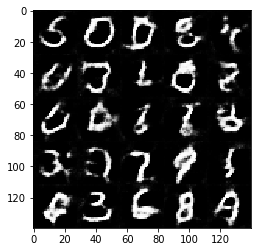

Epoch 1/2... Discriminator Loss:0.7238... Generator Loss:1.0678
Epoch 1/2... Discriminator Loss:1.0006... Generator Loss:0.7012
Epoch 1/2... Discriminator Loss:0.7880... Generator Loss:0.8397
Epoch 1/2... Discriminator Loss:0.9648... Generator Loss:2.0290
Epoch 1/2... Discriminator Loss:1.5142... Generator Loss:0.3765
Epoch 1/2... Discriminator Loss:1.0422... Generator Loss:0.6065
Epoch 1/2... Discriminator Loss:1.0704... Generator Loss:0.6076
Epoch 1/2... Discriminator Loss:0.8809... Generator Loss:1.0348
Epoch 1/2... Discriminator Loss:1.0846... Generator Loss:1.7355
Epoch 1/2... Discriminator Loss:0.8849... Generator Loss:0.8681


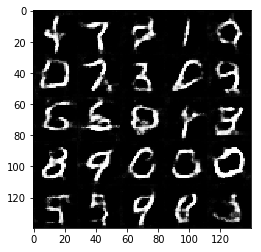

Epoch 1/2... Discriminator Loss:0.9055... Generator Loss:0.8832
Epoch 1/2... Discriminator Loss:1.1114... Generator Loss:1.0476
Epoch 1/2... Discriminator Loss:0.6868... Generator Loss:2.0110
Epoch 1/2... Discriminator Loss:0.8821... Generator Loss:1.1368
Epoch 1/2... Discriminator Loss:0.9366... Generator Loss:0.8662
Epoch 1/2... Discriminator Loss:1.0434... Generator Loss:0.8764
Epoch 1/2... Discriminator Loss:0.7387... Generator Loss:1.5466
Epoch 1/2... Discriminator Loss:1.0755... Generator Loss:0.6249
Epoch 1/2... Discriminator Loss:1.0217... Generator Loss:1.3635
Epoch 1/2... Discriminator Loss:1.0501... Generator Loss:1.1070


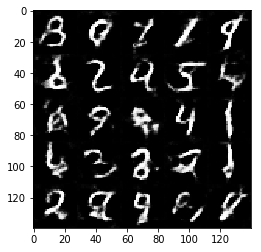

Epoch 1/2... Discriminator Loss:0.8350... Generator Loss:0.9478
Epoch 1/2... Discriminator Loss:0.7172... Generator Loss:1.3205
Epoch 1/2... Discriminator Loss:0.9240... Generator Loss:1.0725
Epoch 1/2... Discriminator Loss:0.7718... Generator Loss:1.2183
Epoch 1/2... Discriminator Loss:0.7210... Generator Loss:1.5250
Epoch 1/2... Discriminator Loss:1.4445... Generator Loss:0.3702
Epoch 1/2... Discriminator Loss:0.8801... Generator Loss:1.1630
Epoch 1/2... Discriminator Loss:0.9987... Generator Loss:0.8735
Epoch 1/2... Discriminator Loss:0.7011... Generator Loss:1.0013
Epoch 1/2... Discriminator Loss:0.7600... Generator Loss:0.8820


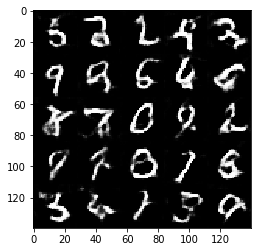

Epoch 1/2... Discriminator Loss:0.7130... Generator Loss:1.0874
Epoch 1/2... Discriminator Loss:1.0104... Generator Loss:0.8434
Epoch 1/2... Discriminator Loss:1.1850... Generator Loss:0.5718
Epoch 1/2... Discriminator Loss:0.8298... Generator Loss:0.9206
Epoch 1/2... Discriminator Loss:0.7679... Generator Loss:1.2715
Epoch 1/2... Discriminator Loss:0.8156... Generator Loss:1.7771
Epoch 1/2... Discriminator Loss:1.1815... Generator Loss:0.4996
Epoch 1/2... Discriminator Loss:0.9028... Generator Loss:0.8140
Epoch 1/2... Discriminator Loss:1.3043... Generator Loss:0.4156
Epoch 1/2... Discriminator Loss:0.8372... Generator Loss:0.8098


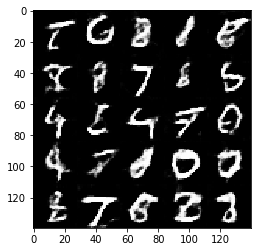

Epoch 1/2... Discriminator Loss:0.6854... Generator Loss:1.2500
Epoch 1/2... Discriminator Loss:0.6729... Generator Loss:1.3193
Epoch 1/2... Discriminator Loss:0.8003... Generator Loss:1.4228
Epoch 1/2... Discriminator Loss:0.8305... Generator Loss:0.9854
Epoch 1/2... Discriminator Loss:0.8460... Generator Loss:0.9070
Epoch 1/2... Discriminator Loss:0.7652... Generator Loss:1.4361
Epoch 1/2... Discriminator Loss:0.9921... Generator Loss:0.8345
Epoch 1/2... Discriminator Loss:0.9196... Generator Loss:0.8472
Epoch 1/2... Discriminator Loss:1.3650... Generator Loss:0.3731
Epoch 1/2... Discriminator Loss:0.8191... Generator Loss:1.5044


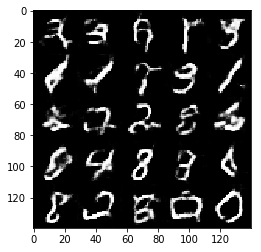

Epoch 1/2... Discriminator Loss:1.1190... Generator Loss:0.5948
Epoch 1/2... Discriminator Loss:0.7729... Generator Loss:1.0675
Epoch 1/2... Discriminator Loss:1.0309... Generator Loss:0.5930
Epoch 1/2... Discriminator Loss:0.9949... Generator Loss:0.7465
Epoch 1/2... Discriminator Loss:0.7525... Generator Loss:1.1562
Epoch 1/2... Discriminator Loss:0.8783... Generator Loss:1.3330
Epoch 1/2... Discriminator Loss:0.5961... Generator Loss:1.2076
Epoch 1/2... Discriminator Loss:0.8248... Generator Loss:0.7973
Epoch 1/2... Discriminator Loss:1.0367... Generator Loss:0.5858
Epoch 1/2... Discriminator Loss:1.1196... Generator Loss:0.5438


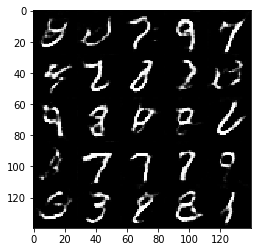

Epoch 1/2... Discriminator Loss:0.5519... Generator Loss:1.4120
Epoch 1/2... Discriminator Loss:0.9105... Generator Loss:0.7913
Epoch 1/2... Discriminator Loss:0.7864... Generator Loss:1.1142
Epoch 1/2... Discriminator Loss:0.9039... Generator Loss:1.7593
Epoch 1/2... Discriminator Loss:0.7786... Generator Loss:0.9401
Epoch 1/2... Discriminator Loss:1.1538... Generator Loss:0.5189
Epoch 1/2... Discriminator Loss:0.8663... Generator Loss:0.8527
Epoch 1/2... Discriminator Loss:0.5810... Generator Loss:1.2723
Epoch 1/2... Discriminator Loss:1.1132... Generator Loss:0.5166
Epoch 1/2... Discriminator Loss:0.7446... Generator Loss:0.9179


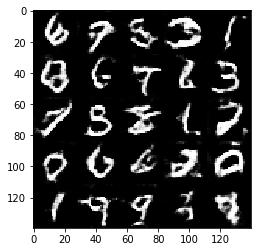

Epoch 1/2... Discriminator Loss:0.9270... Generator Loss:0.7193
Epoch 1/2... Discriminator Loss:0.7773... Generator Loss:1.1861
Epoch 1/2... Discriminator Loss:0.8872... Generator Loss:0.7641
Epoch 1/2... Discriminator Loss:0.6305... Generator Loss:1.6450
Epoch 1/2... Discriminator Loss:1.2299... Generator Loss:0.5139
Epoch 1/2... Discriminator Loss:1.0633... Generator Loss:0.5776
Epoch 1/2... Discriminator Loss:0.7271... Generator Loss:0.9859
Epoch 1/2... Discriminator Loss:1.9572... Generator Loss:5.3420
Epoch 1/2... Discriminator Loss:0.7907... Generator Loss:1.0148
Epoch 1/2... Discriminator Loss:0.9430... Generator Loss:0.6905


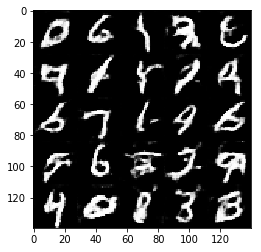

Epoch 1/2... Discriminator Loss:0.8969... Generator Loss:0.7018
Epoch 1/2... Discriminator Loss:0.6631... Generator Loss:1.1473
Epoch 1/2... Discriminator Loss:0.6386... Generator Loss:1.1008
Epoch 1/2... Discriminator Loss:2.6273... Generator Loss:0.1195
Epoch 1/2... Discriminator Loss:1.1612... Generator Loss:0.5719
Epoch 1/2... Discriminator Loss:0.9470... Generator Loss:1.0917
Epoch 1/2... Discriminator Loss:0.8506... Generator Loss:0.8444
Epoch 1/2... Discriminator Loss:1.0004... Generator Loss:0.6735
Epoch 1/2... Discriminator Loss:0.8399... Generator Loss:0.8042
Epoch 1/2... Discriminator Loss:0.6237... Generator Loss:1.0983


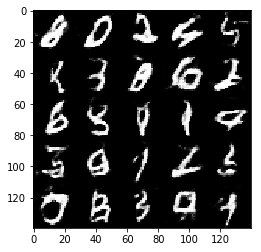

Epoch 1/2... Discriminator Loss:0.7946... Generator Loss:0.8754
Epoch 1/2... Discriminator Loss:0.8138... Generator Loss:0.8166
Epoch 1/2... Discriminator Loss:0.8313... Generator Loss:0.7404
Epoch 1/2... Discriminator Loss:1.8896... Generator Loss:0.2468
Epoch 1/2... Discriminator Loss:1.8697... Generator Loss:0.2919
Epoch 1/2... Discriminator Loss:1.1625... Generator Loss:2.7508
Epoch 1/2... Discriminator Loss:1.0110... Generator Loss:0.9445
Epoch 1/2... Discriminator Loss:0.9674... Generator Loss:0.6964
Epoch 1/2... Discriminator Loss:0.7430... Generator Loss:1.2654
Epoch 1/2... Discriminator Loss:0.8818... Generator Loss:0.7861


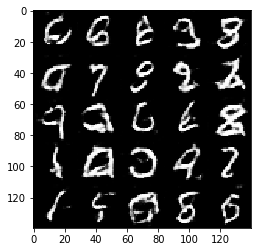

Epoch 1/2... Discriminator Loss:0.6297... Generator Loss:1.2163
Epoch 1/2... Discriminator Loss:1.0878... Generator Loss:0.6082
Epoch 1/2... Discriminator Loss:0.8381... Generator Loss:0.9305
Epoch 1/2... Discriminator Loss:0.9375... Generator Loss:0.6760
Epoch 1/2... Discriminator Loss:0.7012... Generator Loss:1.8047
Epoch 1/2... Discriminator Loss:1.2240... Generator Loss:0.5307
Epoch 1/2... Discriminator Loss:0.6450... Generator Loss:1.1985
Epoch 1/2... Discriminator Loss:1.8046... Generator Loss:0.2794
Epoch 1/2... Discriminator Loss:0.6570... Generator Loss:2.3666
Epoch 1/2... Discriminator Loss:1.1350... Generator Loss:0.5518


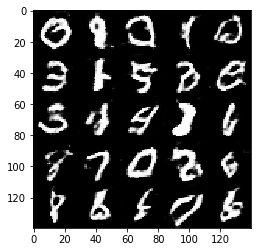

Epoch 1/2... Discriminator Loss:1.3110... Generator Loss:0.4587
Epoch 1/2... Discriminator Loss:0.6584... Generator Loss:1.1465
Epoch 1/2... Discriminator Loss:0.6210... Generator Loss:1.7043
Epoch 1/2... Discriminator Loss:0.8113... Generator Loss:1.0425
Epoch 1/2... Discriminator Loss:0.8084... Generator Loss:0.8655
Epoch 1/2... Discriminator Loss:1.0475... Generator Loss:0.5754
Epoch 1/2... Discriminator Loss:0.3792... Generator Loss:1.6437
Epoch 1/2... Discriminator Loss:0.4871... Generator Loss:1.4989
Epoch 1/2... Discriminator Loss:0.5984... Generator Loss:1.1601
Epoch 1/2... Discriminator Loss:0.8751... Generator Loss:0.8798


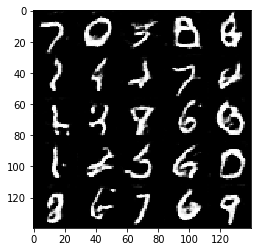

Epoch 1/2... Discriminator Loss:0.7637... Generator Loss:1.5997
Epoch 1/2... Discriminator Loss:1.0232... Generator Loss:0.6441
Epoch 1/2... Discriminator Loss:0.9903... Generator Loss:0.6037
Epoch 1/2... Discriminator Loss:1.3160... Generator Loss:0.4328
Epoch 1/2... Discriminator Loss:0.7984... Generator Loss:2.6079
Epoch 1/2... Discriminator Loss:0.9049... Generator Loss:0.8887
Epoch 1/2... Discriminator Loss:1.5522... Generator Loss:2.1335
Epoch 2/2... Discriminator Loss:0.8468... Generator Loss:0.7956
Epoch 2/2... Discriminator Loss:0.6600... Generator Loss:1.0201
Epoch 2/2... Discriminator Loss:0.5851... Generator Loss:1.0231


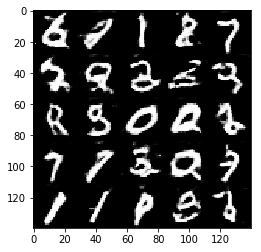

Epoch 2/2... Discriminator Loss:0.6163... Generator Loss:1.3005
Epoch 2/2... Discriminator Loss:0.4635... Generator Loss:1.4007
Epoch 2/2... Discriminator Loss:0.5863... Generator Loss:1.2597
Epoch 2/2... Discriminator Loss:0.4089... Generator Loss:1.4973
Epoch 2/2... Discriminator Loss:0.6690... Generator Loss:1.0835
Epoch 2/2... Discriminator Loss:0.5939... Generator Loss:1.0952
Epoch 2/2... Discriminator Loss:0.8806... Generator Loss:0.8371
Epoch 2/2... Discriminator Loss:1.2640... Generator Loss:0.5368
Epoch 2/2... Discriminator Loss:1.2165... Generator Loss:0.5241
Epoch 2/2... Discriminator Loss:0.6886... Generator Loss:1.4608


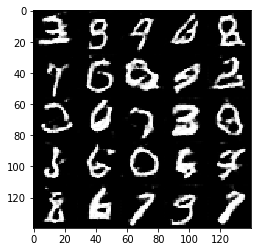

Epoch 2/2... Discriminator Loss:0.5154... Generator Loss:1.3698
Epoch 2/2... Discriminator Loss:0.6027... Generator Loss:1.3037
Epoch 2/2... Discriminator Loss:0.3829... Generator Loss:1.5283
Epoch 2/2... Discriminator Loss:0.6986... Generator Loss:0.9410
Epoch 2/2... Discriminator Loss:0.9644... Generator Loss:0.6556
Epoch 2/2... Discriminator Loss:0.5856... Generator Loss:1.7603
Epoch 2/2... Discriminator Loss:0.9687... Generator Loss:0.6580
Epoch 2/2... Discriminator Loss:0.9907... Generator Loss:0.6503
Epoch 2/2... Discriminator Loss:0.9847... Generator Loss:0.6383
Epoch 2/2... Discriminator Loss:0.5954... Generator Loss:1.6331


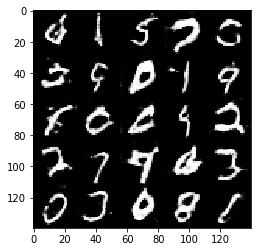

Epoch 2/2... Discriminator Loss:0.7307... Generator Loss:1.2311
Epoch 2/2... Discriminator Loss:0.6514... Generator Loss:1.1330
Epoch 2/2... Discriminator Loss:0.5298... Generator Loss:1.2548
Epoch 2/2... Discriminator Loss:0.7354... Generator Loss:0.9018
Epoch 2/2... Discriminator Loss:0.5554... Generator Loss:1.3681
Epoch 2/2... Discriminator Loss:1.1850... Generator Loss:2.3933
Epoch 2/2... Discriminator Loss:0.6914... Generator Loss:1.1779
Epoch 2/2... Discriminator Loss:0.8050... Generator Loss:1.1763
Epoch 2/2... Discriminator Loss:0.7433... Generator Loss:0.9771
Epoch 2/2... Discriminator Loss:0.7106... Generator Loss:1.0252


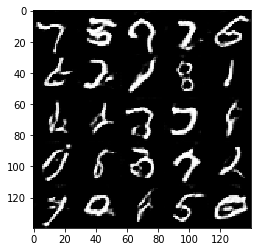

Epoch 2/2... Discriminator Loss:0.3837... Generator Loss:1.5696
Epoch 2/2... Discriminator Loss:0.7072... Generator Loss:0.8859
Epoch 2/2... Discriminator Loss:0.6352... Generator Loss:1.1158
Epoch 2/2... Discriminator Loss:0.5870... Generator Loss:1.1297
Epoch 2/2... Discriminator Loss:0.6927... Generator Loss:1.4645
Epoch 2/2... Discriminator Loss:0.5862... Generator Loss:1.4671
Epoch 2/2... Discriminator Loss:0.5557... Generator Loss:1.7775
Epoch 2/2... Discriminator Loss:0.5063... Generator Loss:1.3569
Epoch 2/2... Discriminator Loss:0.9121... Generator Loss:0.7906
Epoch 2/2... Discriminator Loss:0.8630... Generator Loss:0.8008


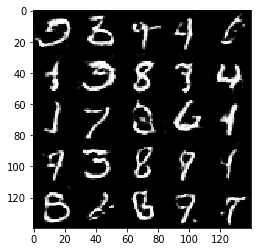

Epoch 2/2... Discriminator Loss:1.5357... Generator Loss:0.3645
Epoch 2/2... Discriminator Loss:0.6080... Generator Loss:1.2656
Epoch 2/2... Discriminator Loss:0.6334... Generator Loss:1.0897
Epoch 2/2... Discriminator Loss:0.3264... Generator Loss:1.8085
Epoch 2/2... Discriminator Loss:1.0517... Generator Loss:0.6748
Epoch 2/2... Discriminator Loss:0.6563... Generator Loss:2.3757
Epoch 2/2... Discriminator Loss:0.4530... Generator Loss:1.6697
Epoch 2/2... Discriminator Loss:0.6307... Generator Loss:1.3523
Epoch 2/2... Discriminator Loss:1.2274... Generator Loss:0.6340
Epoch 2/2... Discriminator Loss:0.7061... Generator Loss:1.4444


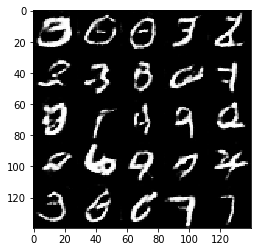

Epoch 2/2... Discriminator Loss:0.8496... Generator Loss:0.7580
Epoch 2/2... Discriminator Loss:0.5179... Generator Loss:1.5555
Epoch 2/2... Discriminator Loss:1.0609... Generator Loss:0.6649
Epoch 2/2... Discriminator Loss:0.6999... Generator Loss:1.1287
Epoch 2/2... Discriminator Loss:0.7536... Generator Loss:0.9608
Epoch 2/2... Discriminator Loss:0.7068... Generator Loss:1.3377
Epoch 2/2... Discriminator Loss:0.5742... Generator Loss:1.2758
Epoch 2/2... Discriminator Loss:1.0992... Generator Loss:0.5703
Epoch 2/2... Discriminator Loss:0.5242... Generator Loss:2.0025
Epoch 2/2... Discriminator Loss:0.7391... Generator Loss:0.9846


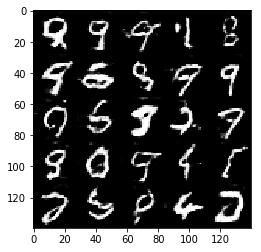

Epoch 2/2... Discriminator Loss:0.8285... Generator Loss:0.9729
Epoch 2/2... Discriminator Loss:0.5621... Generator Loss:1.1287
Epoch 2/2... Discriminator Loss:2.2693... Generator Loss:0.1707
Epoch 2/2... Discriminator Loss:0.4481... Generator Loss:1.5817
Epoch 2/2... Discriminator Loss:0.8276... Generator Loss:0.8843
Epoch 2/2... Discriminator Loss:0.5193... Generator Loss:1.4901
Epoch 2/2... Discriminator Loss:0.5244... Generator Loss:1.2168
Epoch 2/2... Discriminator Loss:1.3763... Generator Loss:0.4680
Epoch 2/2... Discriminator Loss:0.4042... Generator Loss:1.5730
Epoch 2/2... Discriminator Loss:0.6213... Generator Loss:1.2207


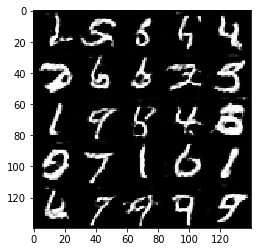

Epoch 2/2... Discriminator Loss:0.5197... Generator Loss:1.2891
Epoch 2/2... Discriminator Loss:0.4575... Generator Loss:1.3964
Epoch 2/2... Discriminator Loss:0.6744... Generator Loss:1.3176
Epoch 2/2... Discriminator Loss:0.3039... Generator Loss:2.5562
Epoch 2/2... Discriminator Loss:0.7413... Generator Loss:0.9477
Epoch 2/2... Discriminator Loss:0.8756... Generator Loss:0.8522
Epoch 2/2... Discriminator Loss:0.8174... Generator Loss:0.7998
Epoch 2/2... Discriminator Loss:0.5100... Generator Loss:1.4490
Epoch 2/2... Discriminator Loss:0.6363... Generator Loss:1.0127
Epoch 2/2... Discriminator Loss:0.3062... Generator Loss:2.6077


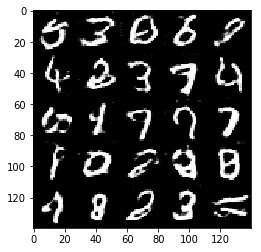

Epoch 2/2... Discriminator Loss:0.5126... Generator Loss:1.5260
Epoch 2/2... Discriminator Loss:0.5641... Generator Loss:1.1401
Epoch 2/2... Discriminator Loss:0.6487... Generator Loss:1.0825
Epoch 2/2... Discriminator Loss:1.0197... Generator Loss:0.7918
Epoch 2/2... Discriminator Loss:0.5715... Generator Loss:1.6269
Epoch 2/2... Discriminator Loss:0.6005... Generator Loss:2.7755
Epoch 2/2... Discriminator Loss:1.0664... Generator Loss:0.6415
Epoch 2/2... Discriminator Loss:0.7144... Generator Loss:3.0562
Epoch 2/2... Discriminator Loss:0.5848... Generator Loss:1.2118
Epoch 2/2... Discriminator Loss:0.7938... Generator Loss:0.9410


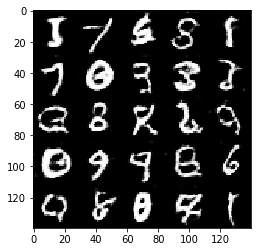

Epoch 2/2... Discriminator Loss:0.4518... Generator Loss:1.6605
Epoch 2/2... Discriminator Loss:0.2436... Generator Loss:2.3530
Epoch 2/2... Discriminator Loss:0.5676... Generator Loss:1.1651
Epoch 2/2... Discriminator Loss:0.6571... Generator Loss:1.1547
Epoch 2/2... Discriminator Loss:0.5133... Generator Loss:1.4243
Epoch 2/2... Discriminator Loss:0.8826... Generator Loss:0.7768
Epoch 2/2... Discriminator Loss:0.9472... Generator Loss:0.9236
Epoch 2/2... Discriminator Loss:0.6011... Generator Loss:1.1451
Epoch 2/2... Discriminator Loss:0.4837... Generator Loss:1.3401
Epoch 2/2... Discriminator Loss:1.2010... Generator Loss:0.5742


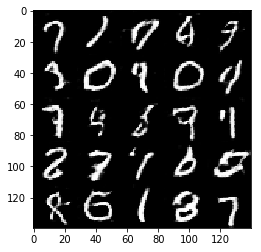

Epoch 2/2... Discriminator Loss:0.9091... Generator Loss:0.7676
Epoch 2/2... Discriminator Loss:0.3575... Generator Loss:2.0358
Epoch 2/2... Discriminator Loss:0.5602... Generator Loss:1.2357
Epoch 2/2... Discriminator Loss:0.8110... Generator Loss:0.9298
Epoch 2/2... Discriminator Loss:0.4953... Generator Loss:1.8272
Epoch 2/2... Discriminator Loss:0.8007... Generator Loss:0.8570
Epoch 2/2... Discriminator Loss:0.5145... Generator Loss:1.3663
Epoch 2/2... Discriminator Loss:0.3983... Generator Loss:1.7588
Epoch 2/2... Discriminator Loss:0.4116... Generator Loss:1.9315
Epoch 2/2... Discriminator Loss:0.5278... Generator Loss:1.3994


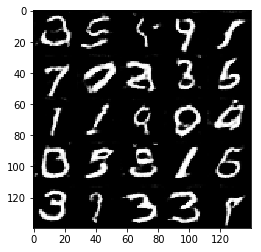

Epoch 2/2... Discriminator Loss:0.4069... Generator Loss:1.5264
Epoch 2/2... Discriminator Loss:0.4363... Generator Loss:1.3491
Epoch 2/2... Discriminator Loss:0.6196... Generator Loss:1.1539
Epoch 2/2... Discriminator Loss:0.6155... Generator Loss:1.0208
Epoch 2/2... Discriminator Loss:0.9738... Generator Loss:0.6656
Epoch 2/2... Discriminator Loss:0.9274... Generator Loss:0.6712
Epoch 2/2... Discriminator Loss:1.3838... Generator Loss:0.5124
Epoch 2/2... Discriminator Loss:0.5666... Generator Loss:1.3492
Epoch 2/2... Discriminator Loss:0.4993... Generator Loss:1.6381
Epoch 2/2... Discriminator Loss:0.4453... Generator Loss:1.4564


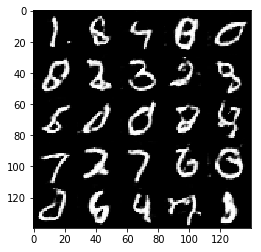

Epoch 2/2... Discriminator Loss:0.3391... Generator Loss:1.6821
Epoch 2/2... Discriminator Loss:0.7183... Generator Loss:0.9529
Epoch 2/2... Discriminator Loss:0.3916... Generator Loss:1.6793
Epoch 2/2... Discriminator Loss:0.6847... Generator Loss:3.4006
Epoch 2/2... Discriminator Loss:0.7878... Generator Loss:1.7388
Epoch 2/2... Discriminator Loss:0.5174... Generator Loss:1.7494
Epoch 2/2... Discriminator Loss:0.9741... Generator Loss:0.7098
Epoch 2/2... Discriminator Loss:0.4909... Generator Loss:1.3914
Epoch 2/2... Discriminator Loss:0.5408... Generator Loss:1.2387
Epoch 2/2... Discriminator Loss:0.5718... Generator Loss:1.2403


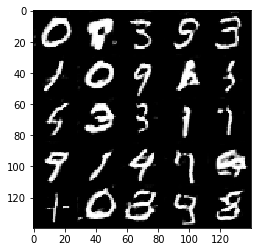

Epoch 2/2... Discriminator Loss:2.0280... Generator Loss:0.2463
Epoch 2/2... Discriminator Loss:0.8967... Generator Loss:0.7476
Epoch 2/2... Discriminator Loss:0.5840... Generator Loss:1.4292
Epoch 2/2... Discriminator Loss:0.5834... Generator Loss:1.0967
Epoch 2/2... Discriminator Loss:0.7123... Generator Loss:0.9427
Epoch 2/2... Discriminator Loss:0.4726... Generator Loss:1.3739
Epoch 2/2... Discriminator Loss:0.2717... Generator Loss:2.0535
Epoch 2/2... Discriminator Loss:0.2952... Generator Loss:1.8102
Epoch 2/2... Discriminator Loss:0.3238... Generator Loss:2.1206
Epoch 2/2... Discriminator Loss:0.8006... Generator Loss:0.8823


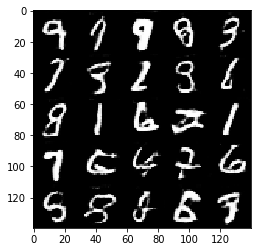

Epoch 2/2... Discriminator Loss:1.0201... Generator Loss:0.6648
Epoch 2/2... Discriminator Loss:1.6865... Generator Loss:0.4216
Epoch 2/2... Discriminator Loss:0.4828... Generator Loss:1.7049
Epoch 2/2... Discriminator Loss:0.5905... Generator Loss:1.1209
Epoch 2/2... Discriminator Loss:0.4658... Generator Loss:1.3207
Epoch 2/2... Discriminator Loss:0.5412... Generator Loss:1.3421
Epoch 2/2... Discriminator Loss:0.6504... Generator Loss:1.0895
Epoch 2/2... Discriminator Loss:0.5909... Generator Loss:1.1607
Epoch 2/2... Discriminator Loss:1.6022... Generator Loss:4.7801
Epoch 2/2... Discriminator Loss:0.3232... Generator Loss:1.8951


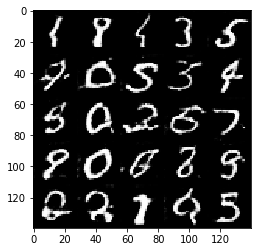

Epoch 2/2... Discriminator Loss:0.8985... Generator Loss:0.7393
Epoch 2/2... Discriminator Loss:0.4015... Generator Loss:2.3173
Epoch 2/2... Discriminator Loss:0.4709... Generator Loss:2.4806
Epoch 2/2... Discriminator Loss:0.5867... Generator Loss:1.3010
Epoch 2/2... Discriminator Loss:0.4566... Generator Loss:1.5095
Epoch 2/2... Discriminator Loss:0.3375... Generator Loss:1.8556
Epoch 2/2... Discriminator Loss:1.2902... Generator Loss:0.4805
Epoch 2/2... Discriminator Loss:0.7080... Generator Loss:1.0164
Epoch 2/2... Discriminator Loss:0.3393... Generator Loss:1.9352
Epoch 2/2... Discriminator Loss:0.7672... Generator Loss:0.8735


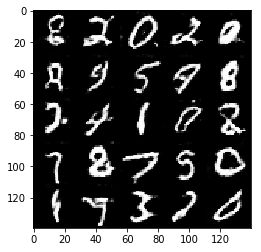

Epoch 2/2... Discriminator Loss:0.4825... Generator Loss:1.2914
Epoch 2/2... Discriminator Loss:0.5426... Generator Loss:1.2725
Epoch 2/2... Discriminator Loss:0.6677... Generator Loss:1.0141
Epoch 2/2... Discriminator Loss:0.3499... Generator Loss:1.8239
Epoch 2/2... Discriminator Loss:0.5919... Generator Loss:1.1516
Epoch 2/2... Discriminator Loss:0.5998... Generator Loss:1.1969
Epoch 2/2... Discriminator Loss:0.6265... Generator Loss:0.9794
Epoch 2/2... Discriminator Loss:0.4720... Generator Loss:1.2777
Epoch 2/2... Discriminator Loss:1.6321... Generator Loss:0.3524
Epoch 2/2... Discriminator Loss:0.2342... Generator Loss:2.3127


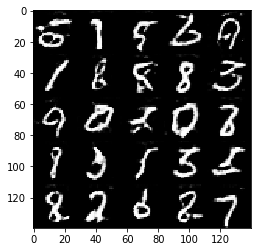

Epoch 2/2... Discriminator Loss:0.5916... Generator Loss:2.0680
Epoch 2/2... Discriminator Loss:0.7140... Generator Loss:3.7640
Epoch 2/2... Discriminator Loss:0.4338... Generator Loss:1.7949
Epoch 2/2... Discriminator Loss:0.6292... Generator Loss:1.0911
Epoch 2/2... Discriminator Loss:0.8498... Generator Loss:0.7922
Epoch 2/2... Discriminator Loss:0.5897... Generator Loss:1.3269
Epoch 2/2... Discriminator Loss:0.3250... Generator Loss:2.0659
Epoch 2/2... Discriminator Loss:0.7244... Generator Loss:0.9232
Epoch 2/2... Discriminator Loss:0.6070... Generator Loss:1.1661
Epoch 2/2... Discriminator Loss:0.5084... Generator Loss:1.4431


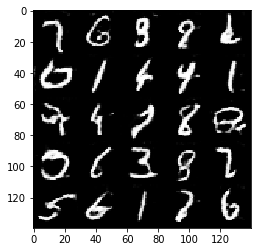

Epoch 2/2... Discriminator Loss:0.4896... Generator Loss:1.4621
Epoch 2/2... Discriminator Loss:0.4239... Generator Loss:1.5606
Epoch 2/2... Discriminator Loss:0.5209... Generator Loss:2.0212
Epoch 2/2... Discriminator Loss:0.6898... Generator Loss:0.9509
Epoch 2/2... Discriminator Loss:0.2955... Generator Loss:1.8082


In [17]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss:0.7801... Generator Loss:0.8822
Epoch 1/1... Discriminator Loss:0.3280... Generator Loss:1.9542
Epoch 1/1... Discriminator Loss:0.8858... Generator Loss:0.9280
Epoch 1/1... Discriminator Loss:0.3931... Generator Loss:5.6161
Epoch 1/1... Discriminator Loss:0.4794... Generator Loss:2.8564
Epoch 1/1... Discriminator Loss:1.2179... Generator Loss:0.4980
Epoch 1/1... Discriminator Loss:0.9717... Generator Loss:0.8528
Epoch 1/1... Discriminator Loss:2.3076... Generator Loss:0.2365
Epoch 1/1... Discriminator Loss:1.6718... Generator Loss:0.2992
Epoch 1/1... Discriminator Loss:0.4144... Generator Loss:2.4121


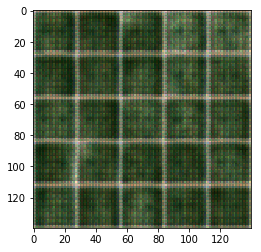

Epoch 1/1... Discriminator Loss:0.3804... Generator Loss:2.0240
Epoch 1/1... Discriminator Loss:0.6765... Generator Loss:1.1882
Epoch 1/1... Discriminator Loss:1.1248... Generator Loss:0.6914
Epoch 1/1... Discriminator Loss:0.4298... Generator Loss:1.9541
Epoch 1/1... Discriminator Loss:0.4089... Generator Loss:2.1134
Epoch 1/1... Discriminator Loss:0.4518... Generator Loss:1.6776
Epoch 1/1... Discriminator Loss:0.5661... Generator Loss:1.1925
Epoch 1/1... Discriminator Loss:0.4434... Generator Loss:2.7395
Epoch 1/1... Discriminator Loss:0.7144... Generator Loss:1.1161
Epoch 1/1... Discriminator Loss:0.3217... Generator Loss:1.9196


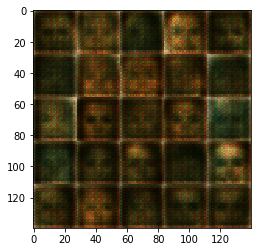

Epoch 1/1... Discriminator Loss:0.4285... Generator Loss:1.5413
Epoch 1/1... Discriminator Loss:1.1451... Generator Loss:4.3408
Epoch 1/1... Discriminator Loss:1.2022... Generator Loss:0.5777
Epoch 1/1... Discriminator Loss:0.8126... Generator Loss:1.5593
Epoch 1/1... Discriminator Loss:0.8033... Generator Loss:0.9903
Epoch 1/1... Discriminator Loss:1.1166... Generator Loss:0.4947
Epoch 1/1... Discriminator Loss:1.4505... Generator Loss:0.3782
Epoch 1/1... Discriminator Loss:0.9138... Generator Loss:1.8687
Epoch 1/1... Discriminator Loss:0.2630... Generator Loss:2.3814
Epoch 1/1... Discriminator Loss:0.6383... Generator Loss:1.2029


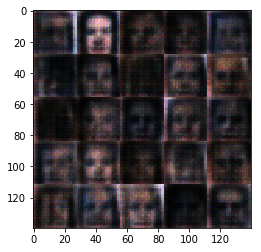

Epoch 1/1... Discriminator Loss:0.4275... Generator Loss:1.4380
Epoch 1/1... Discriminator Loss:0.3489... Generator Loss:3.0563
Epoch 1/1... Discriminator Loss:1.4382... Generator Loss:0.4166
Epoch 1/1... Discriminator Loss:0.9420... Generator Loss:2.2163
Epoch 1/1... Discriminator Loss:0.3270... Generator Loss:2.6718
Epoch 1/1... Discriminator Loss:1.9885... Generator Loss:0.2149
Epoch 1/1... Discriminator Loss:0.6275... Generator Loss:1.9753
Epoch 1/1... Discriminator Loss:0.2034... Generator Loss:2.2623
Epoch 1/1... Discriminator Loss:0.7649... Generator Loss:2.8821
Epoch 1/1... Discriminator Loss:0.3570... Generator Loss:1.7777


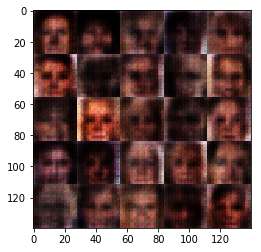

Epoch 1/1... Discriminator Loss:0.5822... Generator Loss:1.2737
Epoch 1/1... Discriminator Loss:0.6720... Generator Loss:3.2611
Epoch 1/1... Discriminator Loss:1.0665... Generator Loss:0.6601
Epoch 1/1... Discriminator Loss:0.8795... Generator Loss:0.9500
Epoch 1/1... Discriminator Loss:0.2000... Generator Loss:3.4873
Epoch 1/1... Discriminator Loss:0.8144... Generator Loss:5.2414
Epoch 1/1... Discriminator Loss:1.4933... Generator Loss:4.9405
Epoch 1/1... Discriminator Loss:1.3911... Generator Loss:0.3986
Epoch 1/1... Discriminator Loss:0.3399... Generator Loss:2.1803
Epoch 1/1... Discriminator Loss:0.2692... Generator Loss:2.1811


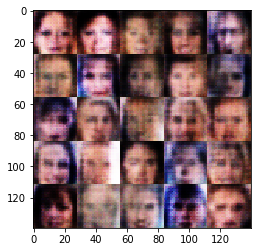

Epoch 1/1... Discriminator Loss:0.6832... Generator Loss:1.1132
Epoch 1/1... Discriminator Loss:0.5130... Generator Loss:1.3363
Epoch 1/1... Discriminator Loss:0.3715... Generator Loss:6.9186
Epoch 1/1... Discriminator Loss:0.7181... Generator Loss:3.5456
Epoch 1/1... Discriminator Loss:0.1461... Generator Loss:2.6983
Epoch 1/1... Discriminator Loss:0.1425... Generator Loss:5.0149
Epoch 1/1... Discriminator Loss:0.3432... Generator Loss:1.5881
Epoch 1/1... Discriminator Loss:0.1756... Generator Loss:2.5751
Epoch 1/1... Discriminator Loss:0.2375... Generator Loss:2.1823
Epoch 1/1... Discriminator Loss:0.0962... Generator Loss:3.1613


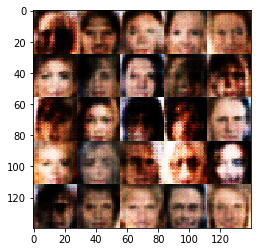

Epoch 1/1... Discriminator Loss:1.4111... Generator Loss:7.8455
Epoch 1/1... Discriminator Loss:0.1759... Generator Loss:3.4707
Epoch 1/1... Discriminator Loss:0.0984... Generator Loss:4.5328
Epoch 1/1... Discriminator Loss:0.8931... Generator Loss:0.7379
Epoch 1/1... Discriminator Loss:0.1383... Generator Loss:4.5239
Epoch 1/1... Discriminator Loss:0.0439... Generator Loss:4.4050
Epoch 1/1... Discriminator Loss:2.1933... Generator Loss:0.1519
Epoch 1/1... Discriminator Loss:0.1233... Generator Loss:3.3412
Epoch 1/1... Discriminator Loss:0.3114... Generator Loss:2.5358
Epoch 1/1... Discriminator Loss:0.3825... Generator Loss:4.6588


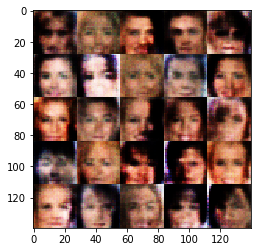

Epoch 1/1... Discriminator Loss:0.2845... Generator Loss:7.6225
Epoch 1/1... Discriminator Loss:0.1980... Generator Loss:5.3354
Epoch 1/1... Discriminator Loss:0.5578... Generator Loss:1.8464
Epoch 1/1... Discriminator Loss:0.7919... Generator Loss:4.5390
Epoch 1/1... Discriminator Loss:0.2105... Generator Loss:2.6749
Epoch 1/1... Discriminator Loss:0.4969... Generator Loss:5.3963
Epoch 1/1... Discriminator Loss:0.1363... Generator Loss:3.5415
Epoch 1/1... Discriminator Loss:0.6500... Generator Loss:1.0949
Epoch 1/1... Discriminator Loss:0.5701... Generator Loss:2.2452
Epoch 1/1... Discriminator Loss:0.2377... Generator Loss:3.1600


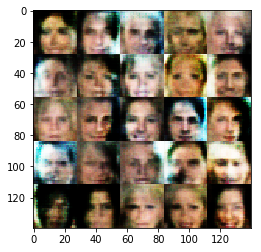

Epoch 1/1... Discriminator Loss:0.2838... Generator Loss:6.5702
Epoch 1/1... Discriminator Loss:0.3398... Generator Loss:5.1744
Epoch 1/1... Discriminator Loss:0.6255... Generator Loss:3.6718
Epoch 1/1... Discriminator Loss:0.2237... Generator Loss:3.5431
Epoch 1/1... Discriminator Loss:1.5979... Generator Loss:0.2775
Epoch 1/1... Discriminator Loss:1.1989... Generator Loss:0.4643
Epoch 1/1... Discriminator Loss:0.3103... Generator Loss:2.6087
Epoch 1/1... Discriminator Loss:0.5755... Generator Loss:4.8851
Epoch 1/1... Discriminator Loss:0.0860... Generator Loss:4.3664
Epoch 1/1... Discriminator Loss:0.1388... Generator Loss:4.2012


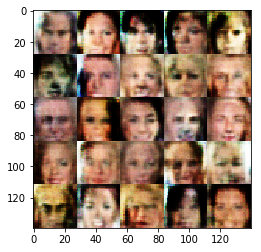

Epoch 1/1... Discriminator Loss:0.1194... Generator Loss:4.4801
Epoch 1/1... Discriminator Loss:0.1664... Generator Loss:2.4680
Epoch 1/1... Discriminator Loss:0.7060... Generator Loss:0.9813
Epoch 1/1... Discriminator Loss:0.5769... Generator Loss:2.0966
Epoch 1/1... Discriminator Loss:0.1803... Generator Loss:3.9267
Epoch 1/1... Discriminator Loss:0.0904... Generator Loss:5.1779
Epoch 1/1... Discriminator Loss:0.2681... Generator Loss:5.0013
Epoch 1/1... Discriminator Loss:0.1977... Generator Loss:2.5006
Epoch 1/1... Discriminator Loss:0.0923... Generator Loss:4.4005
Epoch 1/1... Discriminator Loss:0.2344... Generator Loss:2.4403


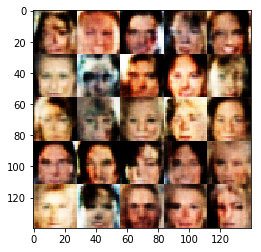

Epoch 1/1... Discriminator Loss:0.2849... Generator Loss:1.7495
Epoch 1/1... Discriminator Loss:0.1839... Generator Loss:2.9529
Epoch 1/1... Discriminator Loss:0.1509... Generator Loss:2.8586
Epoch 1/1... Discriminator Loss:0.1922... Generator Loss:2.6059
Epoch 1/1... Discriminator Loss:0.1674... Generator Loss:4.4140
Epoch 1/1... Discriminator Loss:0.2811... Generator Loss:4.9808
Epoch 1/1... Discriminator Loss:0.2860... Generator Loss:2.0387
Epoch 1/1... Discriminator Loss:0.1278... Generator Loss:4.2182
Epoch 1/1... Discriminator Loss:0.1145... Generator Loss:4.4405
Epoch 1/1... Discriminator Loss:0.3957... Generator Loss:1.5382


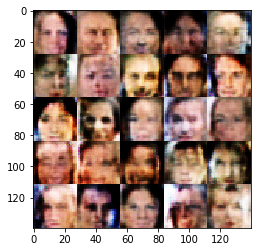

Epoch 1/1... Discriminator Loss:0.5208... Generator Loss:1.1147
Epoch 1/1... Discriminator Loss:0.3130... Generator Loss:6.3261
Epoch 1/1... Discriminator Loss:0.7012... Generator Loss:4.7370
Epoch 1/1... Discriminator Loss:0.2157... Generator Loss:2.1943
Epoch 1/1... Discriminator Loss:0.1095... Generator Loss:3.3303
Epoch 1/1... Discriminator Loss:0.1255... Generator Loss:3.5601
Epoch 1/1... Discriminator Loss:0.3659... Generator Loss:1.7198
Epoch 1/1... Discriminator Loss:0.4142... Generator Loss:1.6562
Epoch 1/1... Discriminator Loss:0.1423... Generator Loss:3.9221
Epoch 1/1... Discriminator Loss:0.2742... Generator Loss:4.3331


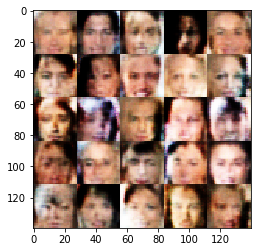

Epoch 1/1... Discriminator Loss:0.3059... Generator Loss:6.6025
Epoch 1/1... Discriminator Loss:0.1730... Generator Loss:4.5384
Epoch 1/1... Discriminator Loss:0.1720... Generator Loss:2.5657
Epoch 1/1... Discriminator Loss:0.2091... Generator Loss:2.3773
Epoch 1/1... Discriminator Loss:0.0639... Generator Loss:4.9219
Epoch 1/1... Discriminator Loss:0.0475... Generator Loss:4.9765
Epoch 1/1... Discriminator Loss:0.1841... Generator Loss:2.9533
Epoch 1/1... Discriminator Loss:0.2549... Generator Loss:3.0847
Epoch 1/1... Discriminator Loss:0.1435... Generator Loss:3.5435
Epoch 1/1... Discriminator Loss:0.1321... Generator Loss:4.8331


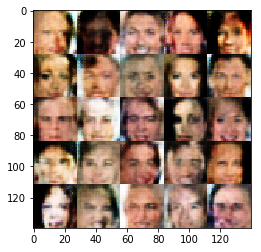

Epoch 1/1... Discriminator Loss:0.7060... Generator Loss:0.9497
Epoch 1/1... Discriminator Loss:0.3129... Generator Loss:1.8966
Epoch 1/1... Discriminator Loss:0.3614... Generator Loss:1.5510
Epoch 1/1... Discriminator Loss:0.0559... Generator Loss:4.4831
Epoch 1/1... Discriminator Loss:0.0936... Generator Loss:3.7469
Epoch 1/1... Discriminator Loss:0.8605... Generator Loss:1.1303
Epoch 1/1... Discriminator Loss:0.2976... Generator Loss:2.0209
Epoch 1/1... Discriminator Loss:0.1851... Generator Loss:5.6138
Epoch 1/1... Discriminator Loss:0.1987... Generator Loss:2.7130
Epoch 1/1... Discriminator Loss:0.1533... Generator Loss:5.7879


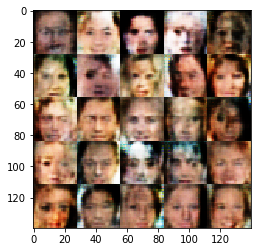

Epoch 1/1... Discriminator Loss:2.8722... Generator Loss:0.0902
Epoch 1/1... Discriminator Loss:1.2421... Generator Loss:0.4601
Epoch 1/1... Discriminator Loss:0.7531... Generator Loss:2.1484
Epoch 1/1... Discriminator Loss:0.3362... Generator Loss:2.0387
Epoch 1/1... Discriminator Loss:0.3162... Generator Loss:1.7734
Epoch 1/1... Discriminator Loss:0.1765... Generator Loss:2.4490
Epoch 1/1... Discriminator Loss:0.1873... Generator Loss:2.4475
Epoch 1/1... Discriminator Loss:0.2942... Generator Loss:3.2314
Epoch 1/1... Discriminator Loss:0.1551... Generator Loss:4.3097
Epoch 1/1... Discriminator Loss:0.5222... Generator Loss:1.2093


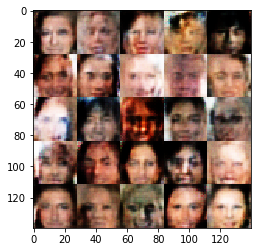

Epoch 1/1... Discriminator Loss:0.2223... Generator Loss:2.0169
Epoch 1/1... Discriminator Loss:0.0566... Generator Loss:5.2804
Epoch 1/1... Discriminator Loss:0.3363... Generator Loss:1.6040
Epoch 1/1... Discriminator Loss:0.2231... Generator Loss:5.0059
Epoch 1/1... Discriminator Loss:0.2045... Generator Loss:2.0968
Epoch 1/1... Discriminator Loss:0.0969... Generator Loss:3.2714
Epoch 1/1... Discriminator Loss:0.6193... Generator Loss:0.9843
Epoch 1/1... Discriminator Loss:0.3723... Generator Loss:1.4247
Epoch 1/1... Discriminator Loss:0.2406... Generator Loss:4.7994
Epoch 1/1... Discriminator Loss:0.2784... Generator Loss:3.7958


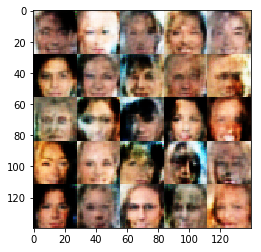

Epoch 1/1... Discriminator Loss:0.3004... Generator Loss:1.7980
Epoch 1/1... Discriminator Loss:0.1209... Generator Loss:4.3097
Epoch 1/1... Discriminator Loss:0.6959... Generator Loss:5.7761
Epoch 1/1... Discriminator Loss:0.0563... Generator Loss:4.1899
Epoch 1/1... Discriminator Loss:0.1770... Generator Loss:2.3874
Epoch 1/1... Discriminator Loss:0.2847... Generator Loss:2.8604
Epoch 1/1... Discriminator Loss:1.5399... Generator Loss:0.3843
Epoch 1/1... Discriminator Loss:0.2183... Generator Loss:2.3579
Epoch 1/1... Discriminator Loss:0.3455... Generator Loss:1.6200
Epoch 1/1... Discriminator Loss:0.1726... Generator Loss:3.9039


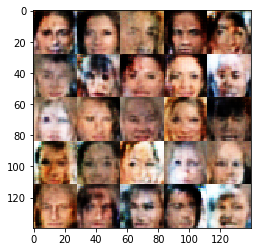

Epoch 1/1... Discriminator Loss:0.7043... Generator Loss:0.8905
Epoch 1/1... Discriminator Loss:0.1363... Generator Loss:2.7636
Epoch 1/1... Discriminator Loss:0.0612... Generator Loss:4.0459
Epoch 1/1... Discriminator Loss:0.3452... Generator Loss:1.7185
Epoch 1/1... Discriminator Loss:0.2412... Generator Loss:2.0268
Epoch 1/1... Discriminator Loss:0.1051... Generator Loss:5.2729
Epoch 1/1... Discriminator Loss:0.0658... Generator Loss:6.2237
Epoch 1/1... Discriminator Loss:0.1199... Generator Loss:2.7118
Epoch 1/1... Discriminator Loss:0.0652... Generator Loss:6.3370
Epoch 1/1... Discriminator Loss:0.1775... Generator Loss:4.3411


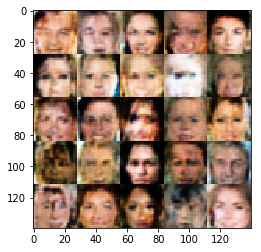

Epoch 1/1... Discriminator Loss:1.5565... Generator Loss:0.4466
Epoch 1/1... Discriminator Loss:0.8670... Generator Loss:0.7622
Epoch 1/1... Discriminator Loss:2.1773... Generator Loss:5.0813
Epoch 1/1... Discriminator Loss:1.0075... Generator Loss:0.6131
Epoch 1/1... Discriminator Loss:0.6108... Generator Loss:1.1645
Epoch 1/1... Discriminator Loss:0.1981... Generator Loss:3.4676
Epoch 1/1... Discriminator Loss:0.1990... Generator Loss:2.6970
Epoch 1/1... Discriminator Loss:0.1720... Generator Loss:3.0295
Epoch 1/1... Discriminator Loss:1.1302... Generator Loss:0.5474
Epoch 1/1... Discriminator Loss:0.5860... Generator Loss:1.0861


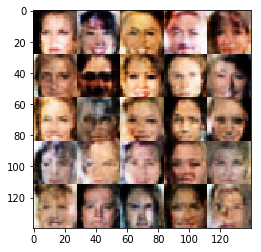

Epoch 1/1... Discriminator Loss:0.2957... Generator Loss:2.0926
Epoch 1/1... Discriminator Loss:0.2263... Generator Loss:4.0503
Epoch 1/1... Discriminator Loss:0.2004... Generator Loss:2.2751
Epoch 1/1... Discriminator Loss:0.1988... Generator Loss:2.5800
Epoch 1/1... Discriminator Loss:0.1140... Generator Loss:3.0929
Epoch 1/1... Discriminator Loss:0.1981... Generator Loss:2.2373
Epoch 1/1... Discriminator Loss:0.1724... Generator Loss:4.0911
Epoch 1/1... Discriminator Loss:0.0799... Generator Loss:5.1993
Epoch 1/1... Discriminator Loss:0.0636... Generator Loss:5.2074
Epoch 1/1... Discriminator Loss:0.1587... Generator Loss:2.6345


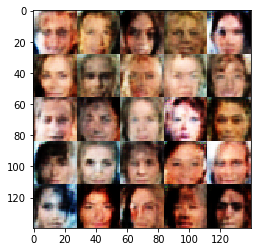

Epoch 1/1... Discriminator Loss:0.4423... Generator Loss:1.5157
Epoch 1/1... Discriminator Loss:2.4149... Generator Loss:0.1400
Epoch 1/1... Discriminator Loss:2.0065... Generator Loss:0.2495
Epoch 1/1... Discriminator Loss:0.7668... Generator Loss:0.8662
Epoch 1/1... Discriminator Loss:0.7099... Generator Loss:2.9289
Epoch 1/1... Discriminator Loss:0.3891... Generator Loss:1.5577
Epoch 1/1... Discriminator Loss:0.0863... Generator Loss:3.3241
Epoch 1/1... Discriminator Loss:0.1199... Generator Loss:3.0357
Epoch 1/1... Discriminator Loss:0.0647... Generator Loss:5.6322
Epoch 1/1... Discriminator Loss:0.6709... Generator Loss:2.0039


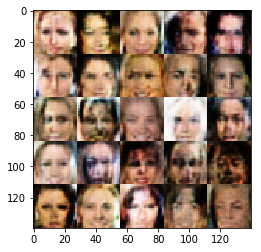

Epoch 1/1... Discriminator Loss:1.3529... Generator Loss:0.4288
Epoch 1/1... Discriminator Loss:0.6050... Generator Loss:1.0077
Epoch 1/1... Discriminator Loss:0.4816... Generator Loss:1.3332
Epoch 1/1... Discriminator Loss:0.1454... Generator Loss:2.5654
Epoch 1/1... Discriminator Loss:0.0758... Generator Loss:3.8114
Epoch 1/1... Discriminator Loss:0.1643... Generator Loss:2.7870
Epoch 1/1... Discriminator Loss:0.1456... Generator Loss:2.5095
Epoch 1/1... Discriminator Loss:0.0980... Generator Loss:3.7377
Epoch 1/1... Discriminator Loss:0.1867... Generator Loss:4.8167
Epoch 1/1... Discriminator Loss:0.8105... Generator Loss:1.9636


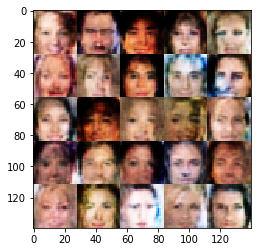

Epoch 1/1... Discriminator Loss:1.0522... Generator Loss:0.7073
Epoch 1/1... Discriminator Loss:0.4629... Generator Loss:1.4969
Epoch 1/1... Discriminator Loss:0.4944... Generator Loss:1.4505
Epoch 1/1... Discriminator Loss:0.1332... Generator Loss:3.3741
Epoch 1/1... Discriminator Loss:0.4646... Generator Loss:3.2732
Epoch 1/1... Discriminator Loss:0.1240... Generator Loss:3.0890
Epoch 1/1... Discriminator Loss:0.3966... Generator Loss:1.4958
Epoch 1/1... Discriminator Loss:0.3490... Generator Loss:1.5955
Epoch 1/1... Discriminator Loss:0.0915... Generator Loss:3.4829
Epoch 1/1... Discriminator Loss:0.1834... Generator Loss:2.6310


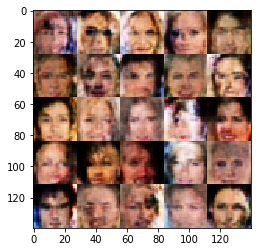

Epoch 1/1... Discriminator Loss:0.1004... Generator Loss:2.8838
Epoch 1/1... Discriminator Loss:0.1330... Generator Loss:2.7782
Epoch 1/1... Discriminator Loss:0.5136... Generator Loss:1.2174
Epoch 1/1... Discriminator Loss:0.2020... Generator Loss:2.1473
Epoch 1/1... Discriminator Loss:0.5980... Generator Loss:4.3755
Epoch 1/1... Discriminator Loss:0.1049... Generator Loss:4.6512
Epoch 1/1... Discriminator Loss:0.0763... Generator Loss:3.4800
Epoch 1/1... Discriminator Loss:0.6325... Generator Loss:0.9766
Epoch 1/1... Discriminator Loss:0.9094... Generator Loss:2.3144
Epoch 1/1... Discriminator Loss:0.5349... Generator Loss:1.3210


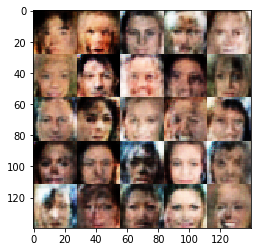

Epoch 1/1... Discriminator Loss:0.6319... Generator Loss:1.1139
Epoch 1/1... Discriminator Loss:0.1800... Generator Loss:2.6836
Epoch 1/1... Discriminator Loss:0.3663... Generator Loss:1.5352
Epoch 1/1... Discriminator Loss:0.4439... Generator Loss:2.4940
Epoch 1/1... Discriminator Loss:0.1516... Generator Loss:4.2210
Epoch 1/1... Discriminator Loss:0.0908... Generator Loss:3.2606
Epoch 1/1... Discriminator Loss:0.1474... Generator Loss:2.8673
Epoch 1/1... Discriminator Loss:0.4647... Generator Loss:1.4547
Epoch 1/1... Discriminator Loss:0.1103... Generator Loss:3.2078
Epoch 1/1... Discriminator Loss:0.1224... Generator Loss:2.7072


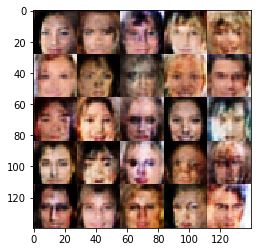

Epoch 1/1... Discriminator Loss:0.2586... Generator Loss:3.7846
Epoch 1/1... Discriminator Loss:0.6591... Generator Loss:1.7030
Epoch 1/1... Discriminator Loss:0.1430... Generator Loss:3.5652
Epoch 1/1... Discriminator Loss:0.1678... Generator Loss:2.8671
Epoch 1/1... Discriminator Loss:1.3522... Generator Loss:0.4240
Epoch 1/1... Discriminator Loss:0.1478... Generator Loss:3.2248
Epoch 1/1... Discriminator Loss:0.1522... Generator Loss:3.2750
Epoch 1/1... Discriminator Loss:0.2104... Generator Loss:2.1365
Epoch 1/1... Discriminator Loss:0.7638... Generator Loss:0.8189
Epoch 1/1... Discriminator Loss:0.2872... Generator Loss:2.2901


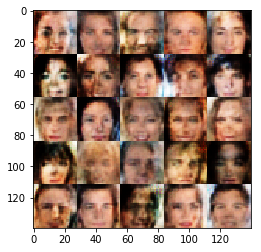

KeyboardInterrupt: 

In [12]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.